In [3]:
from modules import *
from functions import *

In [41]:

def deriv_f(f,dx):
    return -(np.roll(f,1) - np.roll(f,-1))/(2.*dx)

def dderiv_f(f,dx):
    return (np.roll(f,1) + np.roll(f,-1) - 2*f)/dx**2

def gaussian(x, theta, amp=2, sigma=20):
    x = np.linspace(0, 180, N)  # center of tuning curves 
    d = np.abs(theta - x)       # distance to input theta
    y = amp * np.exp(-(d**2)/(2*sigma**2))
    return y

def deriv_gaussian(x, theta, amp=2, sigma=20):
    d = np.abs(theta - x)       # distance to input theta
    y =  - amp * ((x - theta)/sigma**2)* np.exp(-(d**2)/(2*sigma**2))
    return y


def dderiv_gaussian(x, theta, amp=2, sigma=20):
    d = np.abs(theta - x)       # distance to input theta
    y =  - amp * ((1./sigma**2) + (x - theta)**2/sigma**4) * ((x - theta)/sigma**2)* np.exp(-(d**2)/(2*sigma**2))
    return y


def input(x, theta, A_min, A_max):
    # x = np.linspace(0, 180, N)  # center of tuning curves 
    y = (A_max - A_min) * (1. - np.abs(x-theta)/90.) + A_min
    return y

def propens(W):
    return W

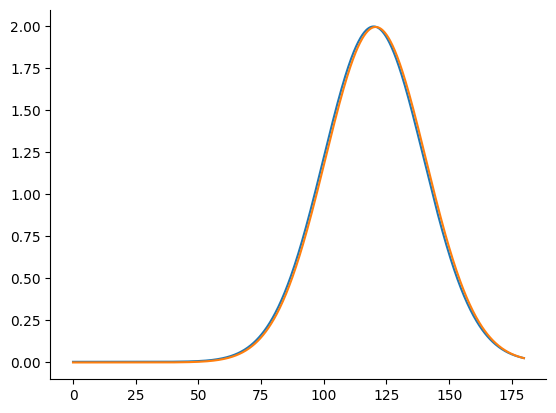

In [42]:
N = 1000

theta = 120
A_max = 1.
A_min = .9

sigma = 20 
nu = 0.002
mu = 0.00001

xs = np.linspace(0., 180., N, endpoint = False)

dx = 180/N

W = gaussian(xs, theta)

W_shifted = W + nu * deriv_gaussian(xs, theta) + mu * dderiv_gaussian(xs, theta)
W_shifted1 = W + nu * deriv_f(W, dx) + mu * dderiv_f(W, dx)
W_shifted2 = W + nu * ( W * (xs - theta)) + mu * (W * (xs - theta)**2 - sigma**2)

y = input(xs, theta, A_min, A_max)

plt.figure(1)
plt.plot(xs, W)
# plt.plot(xs, W_shifted)
# plt.plot(xs, W_shifted1)
plt.plot(xs, W_shifted2)
# plt.plot(xs, y)

# plt.figure(2)
# # plt.plot(xs, deriv_gaussian(xs, theta))
# plt.plot(xs, deriv_f(W, dx))
# plt.plot(xs, deriv_gaussian(xs, theta))

# plt.figure(3)
# plt.plot(xs, dderiv_f(W, dx))
# plt.plot(xs, dderiv_gaussian(xs, theta))

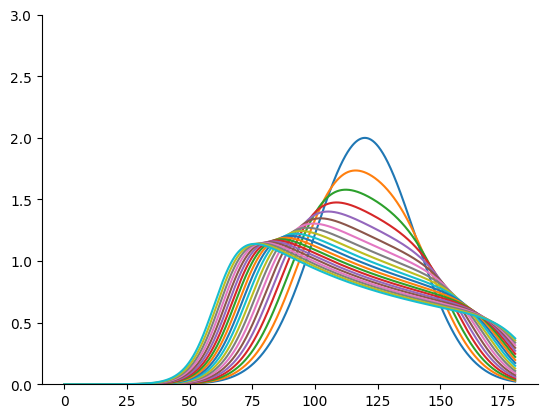

In [49]:
n_iter = 20

W = np.zeros((N, n_iter+1))
W_init = gaussian(xs, theta)

mu = 0.

delta_x = 0.002
gamma = 0.000

W[:, 0] = W_init

for i in range(0, n_iter):

    pW = propens(W[:, i])

    W_max = 180 * np.argmax(W[:, i]) / N 
    x_W_av = np.sum(W[:,i] * pW * xs) / np.sum(W[:,i])
    sigma_W_av = np.sum(W[:,i] * pW * (xs - x_W_av)**2) / np.sum(W[:,i])
    # W[:, i+1] = W[:, i] + nu * deriv_f(W[:, i], dx) + mu * dderiv_f(W[:, i], dx)
    # W[:, i+1] = W[:, i] - delta_x * (W[:, i] * (xs - W_max) - gamma * (W[:, i] * (xs - theta)**2 - sigma**2))
    W[:, i+1] = W[:, i] - delta_x * (W[:, i] * (pW * xs - x_W_av) + gamma * (W[:, i] * pW * (xs - x_W_av)**2 - sigma_W_av))
    # plt.plot(xs, W[:, i] * (xs - x_W_av)**2 - sigma_W_av**2)

plt.figure()
for i in range(n_iter):
    plt.plot(xs, W[:, i])
plt.ylim(0., 3.);